# Web Scraping Tutorial: Scrape the 'Fake Python' Job Site

In this tutorial, you’ll build a web scraper that fetches Python software developer job listings from the [Fake Python Jobs site](https://realpython.github.io/fake-jobs/). It’s an example site with fake job postings that you can freely scrape to train your skills. Your web scraper will parse the HTML on the site to pick out the relevant information and filter that content for specific words.

You can scrape any site on the Internet that you can look at, but the difficulty of doing so depends on the site. This tutorial offers you an introduction to web scraping to help you understand the overall process. Then, you can apply this same process for every website you’ll want to scrape.

*Source: https://realpython.com/beautiful-soup-web-scraper-python/*

##Step 1: Inspect Your Data Source

Before you write any Python code, you need to get to know the website that you want to scrape. That should be your first step for any web scraping project you want to tackle. You’ll need to understand the site structure to extract the information that’s relevant for you. Start by opening [the site you want to scrape](https://realpython.github.io/fake-jobs) with your favorite browser.

Explore the Website

Click through the site and interact with it just like any typical job searcher would. For example, you can scroll through the main page of the website:

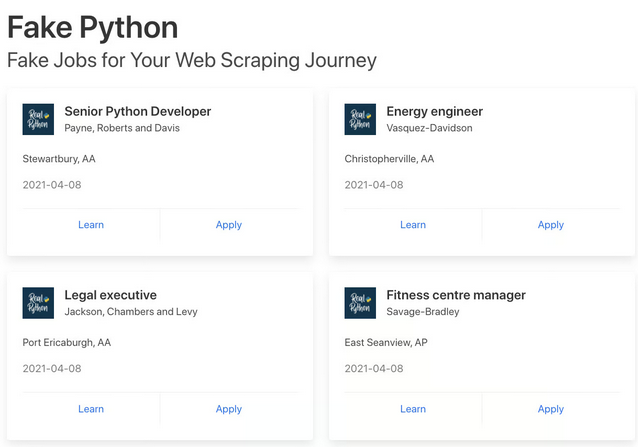

You can see many job postings in a card format, and each of them has two buttons. If you click Apply, then you’ll see a new page that contains more detailed descriptions of the selected job. You might also notice that the URL in your browser’s address bar changes when you interact with the website.

###Decipher the Information in URLs

A programmer can encode a lot of information in a URL. Your web scraping journey will be much easier if you first become familiar with how URLs work and what they’re made of. For example, you might find yourself on a details page that has the following URL:

```https://realpython.github.io/fake-jobs/jobs/senior-python-developer-0.html```


You can deconstruct the above URL into two main parts:

    
    

1.   The base URL represents the path to the search functionality of the website. In the example above, the base URL is https://realpython.github.io/fake-jobs/.
2.   The specific site location that ends with .html is the path to the job description’s unique resource.



Any job posted on this website will use the same base URL. However, the unique resources’ location will be different depending on what specific job posting you’re viewing.

URLs can hold more information than just the location of a file. Some websites use query parameters to encode values that you submit when performing a search. You can think of them as query strings that you send to the database to retrieve specific records.

You’ll find query parameters at the end of a URL. For example, if you go to [Indeed](https://au.indeed.com/) and search for “software developer” in “Riyadh” through their search bar, you’ll see that the URL changes to include these values as query parameters:

```https://au.indeed.com/jobs?q=software+developer&l=Riyadh```

The query parameters in this URL are `?q=software+developer&l=Riyadh`. Query parameters consist of three parts:



1.   **Start**: The beginning of the query parameters is denoted by a question mark (?).
2.   **Information**: The pieces of information constituting one query parameter are encoded in key-value pairs, where related keys and values are joined together by an equals sign (key=value).
3.   **Separator**: Every URL can have multiple query parameters, separated by an ampersand symbol (&).



Equipped with this information, you can pick apart the URL’s query parameters into two key-value pairs:

    

1.   `q=software+developer` selects the type of job.
2.   `l=Riyadh` selects the location of the job.


    

Try to change the search parameters and observe how that affects your URL. Go ahead and enter new values in the search bar up top:

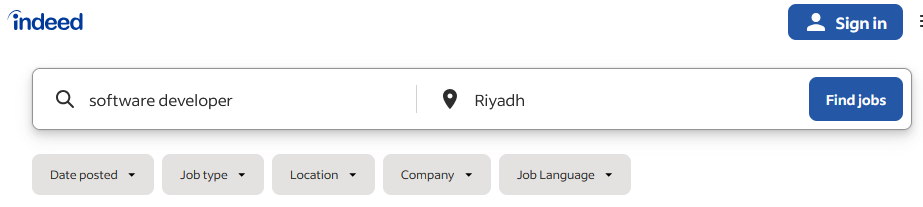

Next, try to change the values directly in your URL. See what happens when you paste the following URL into your browser’s address bar:

https://au.indeed.com/jobs?q=developer&l=perth

If you change and submit the values in the website’s search box, then it’ll be directly reflected in the URL’s query parameters and vice versa. If you change either of them, then you’ll see different results on the website.

As you can see, exploring the URLs of a site can give you insight into how to retrieve data from the website’s server.


Head back to [Fake Python Jobs](https://realpython.github.io/fake-jobs/) and continue exploring it. This site is a purely static website that doesn’t operate on top of a database, which is why you won’t have to work with query parameters in this scraping tutorial.

Inspect the Site Using Developer Tools

Next, you’ll want to learn more about how the data is structured for display. You’ll need to understand the page structure to pick what you want from the HTML response that you’ll collect in one of the upcoming steps.

Developer tools can help you understand the structure of a website. All modern browsers come with developer tools installed. In this section, you’ll see how to work with the developer tools in Chrome. The process will be very similar to other modern browsers.



*   In Chrome on macOS, you can open up the developer tools through the menu by selecting View → Developer → Developer Tools.
*   On Windows and Linux, you can access them by clicking the top-right menu button (⋮) and selecting More Tools → Developer Tools.
*   You can also access your developer tools by right-clicking on the page and selecting the Inspect option or using a [keyboard shortcut](https://developer.chrome.com/docs/devtools/shortcuts/):

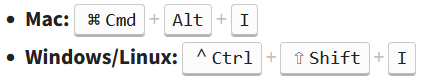    


Developer tools allow you to interactively explore the site’s document object model (DOM) to better understand your source. To dig into your page’s DOM, select the Elements tab in developer tools. You’ll see a structure with clickable HTML elements. You can expand, collapse, and even edit elements right in your browser:



bs4-devtools.f0a236ca5fa3.avif

The HTML on the right represents the structure of the page you can see on the left.

You can think of the text displayed in your browser as the HTML structure of that page. If you’re interested, then you can read more about the difference between the DOM and HTML on [CSS-TRICKS](https://css-tricks.com/dom/).

When you right-click elements on the page, you can select Inspect to zoom to their location in the DOM. You can also hover over the HTML text on your right and see the corresponding elements light up on the page.



###Exercise:
Find a single job posting. What HTML element is it wrapped in, and what other HTML elements does it contain?

Play around and explore! The more you get to know the page you’re working with, the easier it will be to scrape it. However, don’t get too overwhelmed with all that HTML text. You’ll use the power of programming to step through this maze and cherry-pick the information that’s relevant to you.

##Step 2: Scrape HTML Content From a Page

Now that you have an idea of what you’re working with, it’s time to start using Python. First, you’ll want to get the site’s HTML code into your Python script so that you can interact with it. For this task, you’ll use Python’s [requests](https://requests.readthedocs.io/en/latest/) library.

In [ ]:
# Install the requests package (Normally already installed on Colab)
!pip install requests

The following code issues an [HTTP GET request](https://realpython.com/python-requests/#the-get-request) to the given URL. It retrieves the HTML data that the server sends back and stores that data in a Python object:

In [ ]:
# First test

import requests

URL = "https://realpython.github.io/fake-jobs/"
page = requests.get(URL)

# print(page)
print(page.text)


<!DOCTYPE html>
<html>
  <head>
    <meta charset="utf-8">
    <meta name="viewport" content="width=device-width, initial-scale=1">
    <title>Fake Python</title>
    <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/bulma@0.9.2/css/bulma.min.css">
  </head>
  <body>
  <section class="section">
    <div class="container mb-5">
      <h1 class="title is-1">
        Fake Python
      </h1>
      <p class="subtitle is-3">
        Fake Jobs for Your Web Scraping Journey
      </p>
    </div>
    <div class="container">
    <div id="ResultsContainer" class="columns is-multiline">
    <div class="column is-half">
<div class="card">
  <div class="card-content">
    <div class="media">
      <div class="media-left">
        <figure class="image is-48x48">
          <img src="https://files.realpython.com/media/real-python-logo-thumbnail.7f0db70c2ed2.jpg?__no_cf_polish=1" alt="Real Python Logo">
        </figure>
      </div>
      <div class="media-content">
        <h2 class="title is-

When you print the .text attribute of page, you’ll notice that it looks just like the HTML that you inspected earlier with your browser’s developer tools. You successfully fetched the static site content from the Internet! You now have access to the site’s HTML from within your Python script.

### Static Websites

The website that you’re scraping in this tutorial serves static HTML content. In this scenario, the server that hosts the site sends back HTML documents that already contain all the data that you’ll get to see as a user.

When you inspected the page with developer tools earlier on, you discovered that a job posting consists of long and messy-looking HTML:

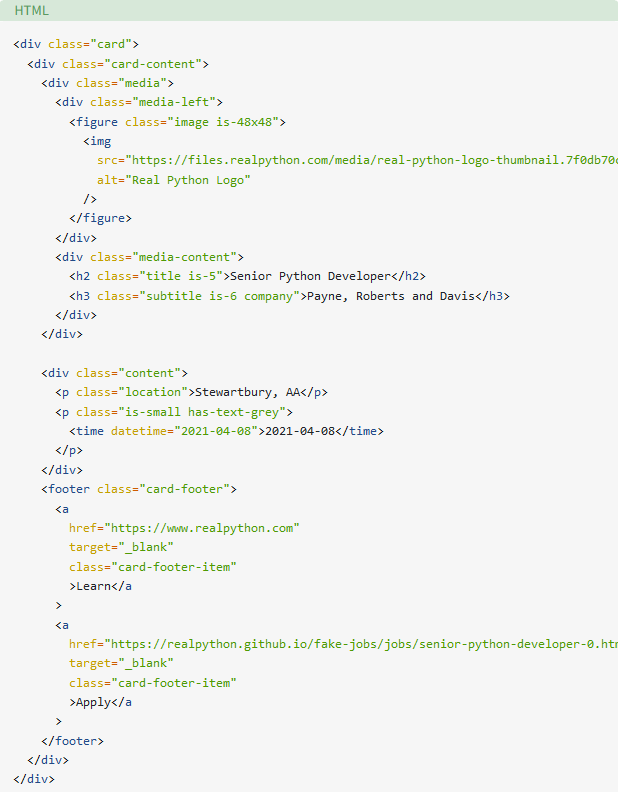

It can be challenging to wrap your head around a long block of HTML code. To make it easier to read, you can use an HTML formatter to clean it up automatically. Good readability helps you better understand the structure of any code block. While it may or may not help improve the HTML formatting, it’s always worth a try.

**Note:** Keep in mind that every website will look different. That’s why it’s necessary to inspect and understand the structure of the site you’re currently working with before moving forward.

The HTML you’ll encounter will sometimes be confusing. Luckily, the HTML of this job board has descriptive class names on the elements that you’re interested in:

    
    
    

*   `class="title is-5"` contains the title of the job posting.
*   `class="subtitle is-6 company"` contains the name of the company that offers the position.
*   `class="location"` contains the location where you’d be working.


In case you ever get lost in a large pile of HTML, remember that you can always go back to your browser and use the developer tools to further explore the HTML structure interactively.

By now, you’ve successfully harnessed the power and user-friendly design of Python’s `requests` library. With only a few lines of code, you managed to scrape static HTML content from the Web and make it available for further processing.

However, there are more challenging situations that you might encounter when you’re scraping websites. Before you learn how to pick the relevant information from the HTML that you just scraped, you’ll take a quick look at two of these more challenging situations.

### Hidden Websites
Some pages contain information that’s hidden behind a login. That means you’ll need an account to be able to scrape anything from the page. The process to make an HTTP request from your Python script is different from how you access a page from your browser. Just because you can log in to the page through your browser doesn’t mean you’ll be able to scrape it with your Python script.

However, the requests library comes with the built-in capacity to [handle authentication](https://docs.python-requests.org/en/master/user/authentication/). With these techniques, you can log in to websites when making the HTTP request from your Python script and then scrape information that’s hidden behind a login. You won’t need to log in to access the job board information, which is why this tutorial won’t cover authentication.

In [ ]:
# Basic Authentication

from requests.auth import HTTPBasicAuth

basic = HTTPBasicAuth('user', 'pass')

hidden_page = requests.get('https://httpbin.org/basic-auth/user/pass', auth=basic)

print(hidden_page.text)

{
  "authenticated": true, 
  "user": "user"
}



In [ ]:
#Shorthand:
hidden_page = requests.get('https://httpbin.org/basic-auth/user/pass', auth=('user', 'pass'))

print(hidden_page.text)

{
  "authenticated": true, 
  "user": "user"
}



See other types of authentification on:
https://docs.python-requests.org/en/latest/user/authentication/

###Dynamic Websites

In this tutorial, you’ll learn how to scrape a static website. Static sites are straightforward to work with because the server sends you an HTML page that already contains all the page information in the response. You can parse that HTML response and immediately begin to pick out the relevant data.

On the other hand, with a dynamic website, the server might not send back any HTML at all. Instead, you could receive [JavaScript](https://realpython.com/python-vs-javascript/) code as a response. This code will look completely different from what you saw when you inspected the page with your browser’s developer tools.

Many modern web applications are designed to provide their functionality in collaboration with the clients’ browsers. Instead of sending HTML pages, these apps send JavaScript code that instructs your browser to create the desired HTML. Web apps deliver dynamic content in this way to offload work from the server to the clients’ machines as well as to avoid page reloads and improve the overall user experience.

When you use requests, you only receive what the server sends back. In the case of a dynamic website, you’ll end up with some JavaScript code instead of HTML. The only way to go from the JavaScript code you received to the content that you’re interested in is to execute the code, just like your browser does. The requests library can’t do that for you, but there are other solutions that can.

For example, [requests-html](https://github.com/psf/requests-html) is a project created by the author of the requests library that allows you to render JavaScript using syntax that’s similar to the syntax in requests. It also includes capabilities for parsing the data by using **Beautiful Soup** under the hood.

Another popular choice for scraping dynamic content is [Selenium](https://realpython.com/modern-web-automation-with-python-and-selenium/). You can think of Selenium as a slimmed-down browser that executes the JavaScript code for you before passing on the rendered HTML response to your script.

You won’t go deeper into scraping dynamically-generated content in this tutorial. For now, it’s enough to remember to look into one of the options mentioned above if you need to scrape a dynamic website.

## Step 3: Parse HTML Code With Beautiful Soup

You’ve successfully scraped some HTML from the Internet, but when you look at it, it just seems like a huge mess. There are tons of HTML elements here and there, thousands of attributes scattered around—and wasn’t there some JavaScript mixed in as well? It’s time to parse this lengthy code response with the help of Python to make it more accessible and pick out the data you want.

[Beautiful Soup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) is a Python library for parsing structured data. It allows you to interact with HTML in a similar way to how you interact with a web page using developer tools. The library exposes a couple of intuitive functions you can use to explore the HTML you received. To get started, install Beautiful Soup:

In [ ]:
#Install Beautiful Soup (already installed in Colab):
!pip install beautifulsoup4

Then, import the library in your Python script and create a Beautiful Soup object:

In [ ]:
import requests
from bs4 import BeautifulSoup

URL = "https://realpython.github.io/fake-jobs/"
page = requests.get(URL)

# Create a Beautiful Soup object that takes page.content, which is the HTML content you scraped earlier, as its input.
soup = BeautifulSoup(page.content, "html.parser")
print(soup)

<!DOCTYPE html>

<html>
<head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<title>Fake Python</title>
<link href="https://cdn.jsdelivr.net/npm/bulma@0.9.2/css/bulma.min.css" rel="stylesheet"/>
</head>
<body>
<section class="section">
<div class="container mb-5">
<h1 class="title is-1">
        Fake Python
      </h1>
<p class="subtitle is-3">
        Fake Jobs for Your Web Scraping Journey
      </p>
</div>
<div class="container">
<div class="columns is-multiline" id="ResultsContainer">
<div class="column is-half">
<div class="card">
<div class="card-content">
<div class="media">
<div class="media-left">
<figure class="image is-48x48">
<img alt="Real Python Logo" src="https://files.realpython.com/media/real-python-logo-thumbnail.7f0db70c2ed2.jpg?__no_cf_polish=1"/>
</figure>
</div>
<div class="media-content">
<h2 class="title is-5">Senior Python Developer</h2>
<h3 class="subtitle is-6 company">Payne, Roberts and Davis</h3>
</div>
</div>

 We pass `page.content` instead of `page.text` to avoid problems with character encoding. The .content attribute holds raw bytes, which can be decoded better than the text representation you printed earlier using the `.text` attribute.

 The second argument, `html.parser`, makes sure that you use the appropriate parser for HTML content.

### Find Elements by ID

In an HTML web page, every element can have an `id` attribute assigned. As the name already suggests, that id attribute makes the element uniquely identifiable on the page. You can begin to parse your page by selecting a specific element by its ID.

Switch back to developer tools and identify the HTML object that contains all the job postings. Explore by hovering over parts of the page and using right-click to Inspect.

**Note:** It helps to periodically switch back to your browser and interactively explore the page using developer tools. This helps you learn how to find the exact elements you’re looking for.

The element you’re looking for is a <div> with an id attribute that has the value "ResultsContainer". It has some other attributes as well, but below is the gist of what you’re looking for:

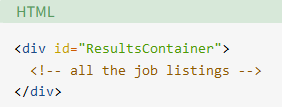

In [ ]:
# Beautiful Soup allows you to find that specific HTML element by its ID:
results = soup.find(id="ResultsContainer")
print(results)

<div class="columns is-multiline" id="ResultsContainer">
<div class="column is-half">
<div class="card">
<div class="card-content">
<div class="media">
<div class="media-left">
<figure class="image is-48x48">
<img alt="Real Python Logo" src="https://files.realpython.com/media/real-python-logo-thumbnail.7f0db70c2ed2.jpg?__no_cf_polish=1"/>
</figure>
</div>
<div class="media-content">
<h2 class="title is-5">Senior Python Developer</h2>
<h3 class="subtitle is-6 company">Payne, Roberts and Davis</h3>
</div>
</div>
<div class="content">
<p class="location">
        Stewartbury, AA
      </p>
<p class="is-small has-text-grey">
<time datetime="2021-04-08">2021-04-08</time>
</p>
</div>
<footer class="card-footer">
<a class="card-footer-item" href="https://www.realpython.com" target="_blank">Learn</a>
<a class="card-footer-item" href="https://realpython.github.io/fake-jobs/jobs/senior-python-developer-0.html" target="_blank">Apply</a>
</footer>
</div>
</div>
</div>
<div class="column is-half">


For easier viewing, you can prettify any Beautiful Soup object when you print it out. If you call `.prettify()` on the `results` variable that you just assigned above, then you’ll see all the HTML contained within the `<div>`:

In [ ]:
print(results.prettify())

<div class="columns is-multiline" id="ResultsContainer">
 <div class="column is-half">
  <div class="card">
   <div class="card-content">
    <div class="media">
     <div class="media-left">
      <figure class="image is-48x48">
       <img alt="Real Python Logo" src="https://files.realpython.com/media/real-python-logo-thumbnail.7f0db70c2ed2.jpg?__no_cf_polish=1"/>
      </figure>
     </div>
     <div class="media-content">
      <h2 class="title is-5">
       Senior Python Developer
      </h2>
      <h3 class="subtitle is-6 company">
       Payne, Roberts and Davis
      </h3>
     </div>
    </div>
    <div class="content">
     <p class="location">
      Stewartbury, AA
     </p>
     <p class="is-small has-text-grey">
      <time datetime="2021-04-08">
       2021-04-08
      </time>
     </p>
    </div>
    <footer class="card-footer">
     <a class="card-footer-item" href="https://www.realpython.com" target="_blank">
      Learn
     </a>
     <a class="card-footer-item" href=

### Find Elements by HTML Class Name
You’ve seen that every job posting is wrapped in a `<div>` element with the class `card-content`. Now you can work with your new object called results and select only the job postings in it. These are, after all, the parts of the HTML that you’re interested in! You can do this in one line of code:

In [ ]:
job_elements = results.find_all("div", class_="card-content")

Here, you call `.find_all()` on a Beautiful Soup object, which returns an [iterable](https://docs.python.org/3/glossary.html#term-iterable) containing all the HTML for all the job listings displayed on that page.

Take a look at all of them:

In [ ]:
for job_element in job_elements:
    print(job_element, end="\n"*2)

<div class="card-content">
<div class="media">
<div class="media-left">
<figure class="image is-48x48">
<img alt="Real Python Logo" src="https://files.realpython.com/media/real-python-logo-thumbnail.7f0db70c2ed2.jpg?__no_cf_polish=1"/>
</figure>
</div>
<div class="media-content">
<h2 class="title is-5">Senior Python Developer</h2>
<h3 class="subtitle is-6 company">Payne, Roberts and Davis</h3>
</div>
</div>
<div class="content">
<p class="location">
        Stewartbury, AA
      </p>
<p class="is-small has-text-grey">
<time datetime="2021-04-08">2021-04-08</time>
</p>
</div>
<footer class="card-footer">
<a class="card-footer-item" href="https://www.realpython.com" target="_blank">Learn</a>
<a class="card-footer-item" href="https://realpython.github.io/fake-jobs/jobs/senior-python-developer-0.html" target="_blank">Apply</a>
</footer>
</div>

<div class="card-content">
<div class="media">
<div class="media-left">
<figure class="image is-48x48">
<img alt="Real Python Logo" src="https://fi

In [ ]:
print(job_elements[0])

<div class="card-content">
<div class="media">
<div class="media-left">
<figure class="image is-48x48">
<img alt="Real Python Logo" src="https://files.realpython.com/media/real-python-logo-thumbnail.7f0db70c2ed2.jpg?__no_cf_polish=1"/>
</figure>
</div>
<div class="media-content">
<h2 class="title is-5">Senior Python Developer</h2>
<h3 class="subtitle is-6 company">Payne, Roberts and Davis</h3>
</div>
</div>
<div class="content">
<p class="location">
        Stewartbury, AA
      </p>
<p class="is-small has-text-grey">
<time datetime="2021-04-08">2021-04-08</time>
</p>
</div>
<footer class="card-footer">
<a class="card-footer-item" href="https://www.realpython.com" target="_blank">Learn</a>
<a class="card-footer-item" href="https://realpython.github.io/fake-jobs/jobs/senior-python-developer-0.html" target="_blank">Apply</a>
</footer>
</div>


That’s already pretty neat, but there’s still a lot of HTML! You saw earlier that your page has descriptive class names on some elements. You can pick out those child elements from each job posting with `.find()`:

In [ ]:
for job_element in job_elements:
    title_element = job_element.find("h2", class_="title")
    company_element = job_element.find("h3", class_="company")
    location_element = job_element.find("p", class_="location")
    print(title_element)
    print(company_element)
    print(location_element)
    print()

<h2 class="title is-5">Senior Python Developer</h2>
<h3 class="subtitle is-6 company">Payne, Roberts and Davis</h3>
<p class="location">
        Stewartbury, AA
      </p>

<h2 class="title is-5">Energy engineer</h2>
<h3 class="subtitle is-6 company">Vasquez-Davidson</h3>
<p class="location">
        Christopherville, AA
      </p>

<h2 class="title is-5">Legal executive</h2>
<h3 class="subtitle is-6 company">Jackson, Chambers and Levy</h3>
<p class="location">
        Port Ericaburgh, AA
      </p>

<h2 class="title is-5">Fitness centre manager</h2>
<h3 class="subtitle is-6 company">Savage-Bradley</h3>
<p class="location">
        East Seanview, AP
      </p>

<h2 class="title is-5">Product manager</h2>
<h3 class="subtitle is-6 company">Ramirez Inc</h3>
<p class="location">
        North Jamieview, AP
      </p>

<h2 class="title is-5">Medical technical officer</h2>
<h3 class="subtitle is-6 company">Rogers-Yates</h3>
<p class="location">
        Davidville, AP
      </p>

<h2 class="t

Each `job_element` is another `BeautifulSoup()` object. Therefore, you can use the same methods on it as you did on its parent element, `results`.

With this code snippet, you’re getting closer and closer to the data that you’re actually interested in. Still, there’s a lot going on with all those HTML tags and attributes floating around:

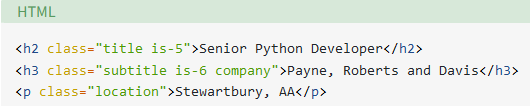

Next, you’ll learn how to narrow down this output to access only the text content you’re interested in.

### Extract Text From HTML Elements

You only want to see the title, company, and location of each job posting. And behold! Beautiful Soup has got you covered. You can add .text to a Beautiful Soup object to return only the text content of the HTML elements that the object contains:

In [ ]:
for job_element in job_elements:
    title_element = job_element.find("h2", class_="title")
    company_element = job_element.find("h3", class_="company")
    location_element = job_element.find("p", class_="location")
    print(title_element.text)
    print(company_element.text)
    print(location_element.text)
    print()

Senior Python Developer
Payne, Roberts and Davis

        Stewartbury, AA
      

Energy engineer
Vasquez-Davidson

        Christopherville, AA
      

Legal executive
Jackson, Chambers and Levy

        Port Ericaburgh, AA
      

Fitness centre manager
Savage-Bradley

        East Seanview, AP
      

Product manager
Ramirez Inc

        North Jamieview, AP
      

Medical technical officer
Rogers-Yates

        Davidville, AP
      

Physiological scientist
Kramer-Klein

        South Christopher, AE
      

Textile designer
Meyers-Johnson

        Port Jonathan, AE
      

Television floor manager
Hughes-Williams

        Osbornetown, AE
      

Waste management officer
Jones, Williams and Villa

        Scotttown, AP
      

Software Engineer (Python)
Garcia PLC

        Ericberg, AE
      

Interpreter
Gregory and Sons

        Ramireztown, AE
      

Architect
Clark, Garcia and Sosa

        Figueroaview, AA
      

Meteorologist
Bush PLC

        Kelseystad, AA
      

Audiolo

 It’s possible that you’ll get some extra whitespace. Since you’re now working with Python strings, you can `.strip()` the superfluous whitespace. You can also apply any other familiar Python string methods to further clean up your text:

In [ ]:
for job_element in job_elements:
    title_element = job_element.find("h2", class_="title")
    company_element = job_element.find("h3", class_="company")
    location_element = job_element.find("p", class_="location")
    print(title_element.text.strip())
    print(company_element.text.strip())
    print(location_element.text.strip())
    print()

Senior Python Developer
Payne, Roberts and Davis
Stewartbury, AA

Energy engineer
Vasquez-Davidson
Christopherville, AA

Legal executive
Jackson, Chambers and Levy
Port Ericaburgh, AA

Fitness centre manager
Savage-Bradley
East Seanview, AP

Product manager
Ramirez Inc
North Jamieview, AP

Medical technical officer
Rogers-Yates
Davidville, AP

Physiological scientist
Kramer-Klein
South Christopher, AE

Textile designer
Meyers-Johnson
Port Jonathan, AE

Television floor manager
Hughes-Williams
Osbornetown, AE

Waste management officer
Jones, Williams and Villa
Scotttown, AP

Software Engineer (Python)
Garcia PLC
Ericberg, AE

Interpreter
Gregory and Sons
Ramireztown, AE

Architect
Clark, Garcia and Sosa
Figueroaview, AA

Meteorologist
Bush PLC
Kelseystad, AA

Audiological scientist
Salazar-Meyers
Williamsburgh, AE

English as a second language teacher
Parker, Murphy and Brooks
Mitchellburgh, AE

Surgeon
Cruz-Brown
West Jessicabury, AA

Equities trader
Macdonald-Ferguson
Maloneshire, AE


That’s a readable list of jobs that also includes the company name and each job’s location. However, you’re looking for a position as a software developer, and these results contain job postings in many other fields as well.

### Find Elements by Class Name and Text Content

Not all of the job listings are developer jobs. Instead of printing out all the jobs listed on the website, you’ll first filter them using keywords.

You know that job titles in the page are kept within `<h2>` elements. To filter for only specific jobs, you can use the string argument:

In [ ]:
python_jobs = results.find_all("h2", string="Python")

This code finds all `<h2>` elements where the contained string matches "Python" exactly. Note that you’re directly calling the method on your first `results` variable. If you go ahead and `print()` the output of the above code snippet to your console, then you might be disappointed because it’ll be empty:

In [ ]:
print(python_jobs)

[]


There was a Python job in the search results, so why is it not showing up?

When you use `string=` as you did above, your program looks for that string **exactly**. Any differences in the spelling, capitalization, or whitespace will prevent the element from matching. In the next section, you’ll find a way to make your search string more general.

### Pass a Function to a Beautiful Soup Method
In addition to strings, you can sometimes pass functions as arguments to Beautiful Soup methods. You can change the previous line of code to use a function instead:


In [ ]:
python_jobs = results.find_all(
    "h2", string=lambda text: "python" in text.lower()
)

Now you’re passing an anonymous function to the `string=` argument. The lambda function looks at the text of each `<h2>` element, converts it to lowercase, and checks whether the substring "python" is found anywhere. You can check whether you managed to identify all the Python jobs with this approach:

In [ ]:
print(python_jobs)
print(len(python_jobs))


[<h2 class="title is-5">Senior Python Developer</h2>, <h2 class="title is-5">Software Engineer (Python)</h2>, <h2 class="title is-5">Python Programmer (Entry-Level)</h2>, <h2 class="title is-5">Python Programmer (Entry-Level)</h2>, <h2 class="title is-5">Software Developer (Python)</h2>, <h2 class="title is-5">Python Developer</h2>, <h2 class="title is-5">Back-End Web Developer (Python, Django)</h2>, <h2 class="title is-5">Back-End Web Developer (Python, Django)</h2>, <h2 class="title is-5">Python Programmer (Entry-Level)</h2>, <h2 class="title is-5">Software Developer (Python)</h2>]
10


Your program has found 10 matching job posts that include the word "python" in their job title!

Finding elements depending on their text content is a powerful way to filter your HTML response for specific information. Beautiful Soup allows you to use either exact strings or functions as arguments for filtering text in Beautiful Soup objects.

This seems like a good moment to run your `for` loop and print the title, location, and company information of the Python jobs you identified:

In [ ]:
python_jobs = results.find_all(
    "h2", string=lambda text: "python" in text.lower()
)

for job_element in python_jobs:
    title_element = job_element.find("h2", class_="title")
    company_element = job_element.find("h3", class_="company")
    location_element = job_element.find("p", class_="location")
    print(title_element.text.strip())
    print(company_element.text.strip())
    print(location_element.text.strip())
    print()

AttributeError: 'NoneType' object has no attribute 'text'

However, when you try to run your scraper to print out the information of the filtered Python jobs, you’ll run into an error:

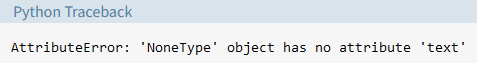

This message is a common error that you’ll run into a lot when you’re scraping information from the Internet. Inspect the HTML of an element in your `python_jobs` list. What does it look like? Where do you think the error is coming from?

### Identify Error Conditions

When you look at a single element in python_jobs, you’ll see that it consists of only the `<h2>` element that contains the job title:

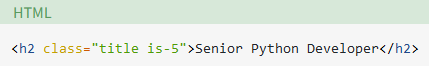

When you revisit the code you used to select the items, you’ll see that that’s what you targeted. You filtered for only the `<h2>` title elements of the job postings that contain the word "python". As you can see, these elements don’t include the rest of the information about the job.

You tried to find the job title, the company name, and the job’s location in each element in `python_jobs`, but each element contains only the job title text.

Your diligent parsing library still looks for the other ones, too, and returns None because it can’t find them. Then, `print()` fails with the shown error message when you try to extract the `.text` attribute from one of these `None` objects.

The text you’re looking for is nested in sibling elements of the `<h2>` elements your filter returned. Beautiful Soup can help you to select sibling, child, and parent elements of each Beautiful Soup object.

### Access Parent Elements

One way to get access to all the information you need is to step up in the hierarchy of the DOM starting from the `<h2>` elements that you identified. Take another look at the HTML of a single job posting. Find the `<h2>` element that contains the job title as well as its closest parent element that contains all the information that you’re interested in:

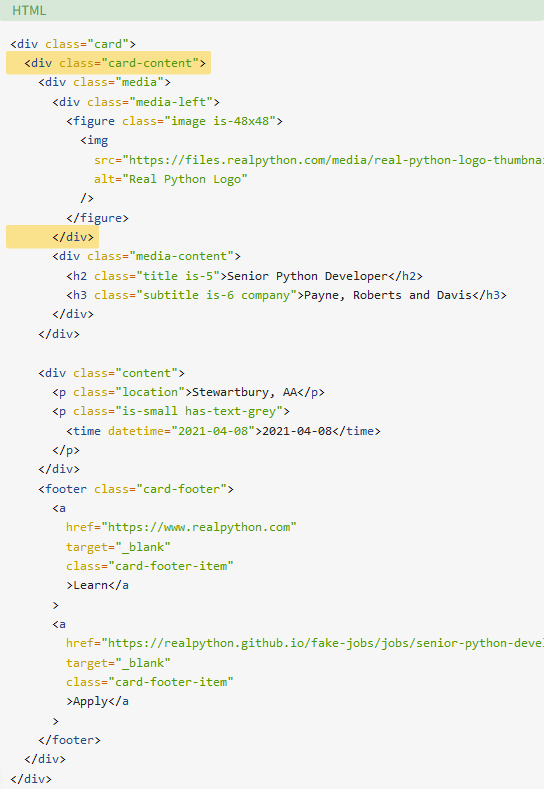

The `<div>` element with the card-content class contains all the information you want. It’s a third-level parent of the `<h2>` title element that you found using your filter.

With this information in mind, you can now use the elements in python_jobs and fetch their great-grandparent elements instead to get access to all the information you want:

In [ ]:
python_jobs = results.find_all(
    "h2", string=lambda text: "python" in text.lower()
)

python_job_elements = [
    h2_element.parent.parent.parent for h2_element in python_jobs
]

You added a [list comprehension](https://realpython.com/list-comprehension-python/) that operates on each of the `<h2>` title elements in python_jobs that you got by filtering with the lambda expression. You’re selecting the parent element of the parent element of the parent element of each `<h2>` title element. That’s three generations up!

When you were looking at the HTML of a single job posting, you identified that this specific parent element with the class name card-content contains all the information you need.

Now you can adapt the code in your for loop to iterate over the parent elements instead:

In [ ]:
for job_element in python_job_elements:
    title_element = job_element.find("h2", class_="title")
    company_element = job_element.find("h3", class_="company")
    location_element = job_element.find("p", class_="location")
    print(title_element.text.strip())
    print(company_element.text.strip())
    print(location_element.text.strip())
    print()


Senior Python Developer
Payne, Roberts and Davis
Stewartbury, AA

Software Engineer (Python)
Garcia PLC
Ericberg, AE

Python Programmer (Entry-Level)
Moss, Duncan and Allen
Port Sara, AE

Python Programmer (Entry-Level)
Cooper and Sons
West Victor, AE

Software Developer (Python)
Adams-Brewer
Brockburgh, AE

Python Developer
Rivera and Sons
East Michaelfort, AA

Back-End Web Developer (Python, Django)
Stewart-Alexander
South Kimberly, AA

Back-End Web Developer (Python, Django)
Jackson, Ali and Mckee
New Elizabethside, AA

Python Programmer (Entry-Level)
Mathews Inc
Robertborough, AP

Software Developer (Python)
Moreno-Rodriguez
Martinezburgh, AE



When you run your script another time, you’ll see that your code once again has access to all the relevant information. That’s because you’re now looping over the `<div class="card-content">` elements instead of just the `<h2>` title elements.

Using the `.parent` attribute that each Beautiful Soup object comes with gives you an intuitive way of stepping through your DOM structure and addressing the elements you need. You can also access child elements and sibling elements in a similar manner. Read up on [navigating the tree](https://www.crummy.com/software/BeautifulSoup/bs4/doc/#navigating-the-tree) for more information.

### Extract Attributes From HTML Elements

At this point, your Python script already scrapes the site and filters its HTML for relevant job postings. Well done! However, what’s still missing is the link to apply for a job.

While you were inspecting the page, you found two links at the bottom of each card. If you handle the link elements in the same way as you handled the other elements, you won’t get the URLs that you’re interested in:

In [ ]:
for job_element in python_job_elements:
    title_element = job_element.find("h2", class_="title")
    company_element = job_element.find("h3", class_="company")
    location_element = job_element.find("p", class_="location")
    print(title_element.text.strip())
    print(company_element.text.strip())
    print(location_element.text.strip())
    print()
    links = job_element.find_all("a")
    for link in links:
        print(link.text.strip())

Senior Python Developer
Payne, Roberts and Davis
Stewartbury, AA

Learn
Apply
Software Engineer (Python)
Garcia PLC
Ericberg, AE

Learn
Apply
Python Programmer (Entry-Level)
Moss, Duncan and Allen
Port Sara, AE

Learn
Apply
Python Programmer (Entry-Level)
Cooper and Sons
West Victor, AE

Learn
Apply
Software Developer (Python)
Adams-Brewer
Brockburgh, AE

Learn
Apply
Python Developer
Rivera and Sons
East Michaelfort, AA

Learn
Apply
Back-End Web Developer (Python, Django)
Stewart-Alexander
South Kimberly, AA

Learn
Apply
Back-End Web Developer (Python, Django)
Jackson, Ali and Mckee
New Elizabethside, AA

Learn
Apply
Python Programmer (Entry-Level)
Mathews Inc
Robertborough, AP

Learn
Apply
Software Developer (Python)
Moreno-Rodriguez
Martinezburgh, AE

Learn
Apply


If you run this code snippet, then you’ll get the link texts `Learn` and `Apply` instead of the associated URLs.

That’s because the `.text` attribute leaves only the visible content of an HTML element. It strips away all HTML tags, including the HTML attributes containing the URL, and leaves you with just the link text. To get the URL instead, you need to extract the value of one of the HTML attributes instead of discarding it.

The URL of a link element is associated with the `href` attribute. The specific URL that you’re looking for is the value of the href attribute of the second `<a>` tag at the bottom the HTML of a single job posting:

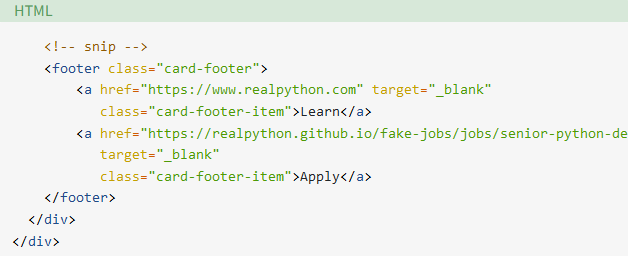

Start by fetching all the `<a>` elements in a job card. Then, extract the value of their href attributes using square-bracket notation:

In [ ]:
for job_element in python_job_elements:
    title_element = job_element.find("h2", class_="title")
    company_element = job_element.find("h3", class_="company")
    location_element = job_element.find("p", class_="location")
    print(title_element.text.strip())
    print(company_element.text.strip())
    print(location_element.text.strip())
    print()
    links = job_element.find_all("a")
    for link in links:
        link_url = link["href"]
        print(f"Apply here: {link_url}\n")

Senior Python Developer
Payne, Roberts and Davis
Stewartbury, AA

Apply here: https://www.realpython.com

Apply here: https://realpython.github.io/fake-jobs/jobs/senior-python-developer-0.html

Software Engineer (Python)
Garcia PLC
Ericberg, AE

Apply here: https://www.realpython.com

Apply here: https://realpython.github.io/fake-jobs/jobs/software-engineer-python-10.html

Python Programmer (Entry-Level)
Moss, Duncan and Allen
Port Sara, AE

Apply here: https://www.realpython.com

Apply here: https://realpython.github.io/fake-jobs/jobs/python-programmer-entry-level-20.html

Python Programmer (Entry-Level)
Cooper and Sons
West Victor, AE

Apply here: https://www.realpython.com

Apply here: https://realpython.github.io/fake-jobs/jobs/python-programmer-entry-level-30.html

Software Developer (Python)
Adams-Brewer
Brockburgh, AE

Apply here: https://www.realpython.com

Apply here: https://realpython.github.io/fake-jobs/jobs/software-developer-python-40.html

Python Developer
Rivera and Son

In this code snippet, you first fetched all links from each of the filtered job postings. Then you extracted the `href` attribute, which contains the URL, using `["href"]` and printed it to your console.

### Exercise: Refine your results
Each job card has two links associated with it. You’re looking for only the second link. How can you edit the code snippet shown above so that you always collect only the URL of the second link?

In [ ]:
for job_element in python_job_elements:
    title_element = job_element.find("h2", class_="title")
    company_element = job_element.find("h3", class_="company")
    location_element = job_element.find("p", class_="location")
    print(title_element.text.strip())
    print(company_element.text.strip())
    print(location_element.text.strip())
    link = job_element.find_all("a")[1]["href"]
    print(link)
    print()

    # for link in links:
    #     link_url = link["href"]
    #     print(f"Apply here: {link_url}\n")

Senior Python Developer
Payne, Roberts and Davis
Stewartbury, AA
https://realpython.github.io/fake-jobs/jobs/senior-python-developer-0.html

Software Engineer (Python)
Garcia PLC
Ericberg, AE
https://realpython.github.io/fake-jobs/jobs/software-engineer-python-10.html

Python Programmer (Entry-Level)
Moss, Duncan and Allen
Port Sara, AE
https://realpython.github.io/fake-jobs/jobs/python-programmer-entry-level-20.html

Python Programmer (Entry-Level)
Cooper and Sons
West Victor, AE
https://realpython.github.io/fake-jobs/jobs/python-programmer-entry-level-30.html

Software Developer (Python)
Adams-Brewer
Brockburgh, AE
https://realpython.github.io/fake-jobs/jobs/software-developer-python-40.html

Python Developer
Rivera and Sons
East Michaelfort, AA
https://realpython.github.io/fake-jobs/jobs/python-developer-50.html

Back-End Web Developer (Python, Django)
Stewart-Alexander
South Kimberly, AA
https://realpython.github.io/fake-jobs/jobs/back-end-web-developer-python-django-60.html

Back-

## Additional Exercise 1: Extract Specific Data

Try extracting and printing all text inside `<h2>` tags.
Store the result in a list called `h2_texts`.

In [ ]:
# Extract all text from <h2> tags
h2_texts = [tag.get_text() for tag in soup.find_all('h2')]
h2_texts  # Display extracted texts

['Senior Python Developer',
 'Energy engineer',
 'Legal executive',
 'Fitness centre manager',
 'Product manager',
 'Medical technical officer',
 'Physiological scientist',
 'Textile designer',
 'Television floor manager',
 'Waste management officer',
 'Software Engineer (Python)',
 'Interpreter',
 'Architect',
 'Meteorologist',
 'Audiological scientist',
 'English as a second language teacher',
 'Surgeon',
 'Equities trader',
 'Newspaper journalist',
 'Materials engineer',
 'Python Programmer (Entry-Level)',
 'Product/process development scientist',
 'Scientist, research (maths)',
 'Ecologist',
 'Materials engineer',
 'Historic buildings inspector/conservation officer',
 'Data scientist',
 'Psychiatrist',
 'Structural engineer',
 'Immigration officer',
 'Python Programmer (Entry-Level)',
 'Neurosurgeon',
 'Broadcast engineer',
 'Make',
 'Nurse, adult',
 'Air broker',
 'Editor, film/video',
 'Production assistant, radio',
 'Engineer, communications',
 'Sales executive',
 'Software Deve

## Additional Exercise 2: Advanced Headers

Write a request to `https://example.com` including headers for `User-Agent` and `Accept-Language`.
Store the response content in `content_with_language_header`.

In [ ]:
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64)',
    'Accept-Language': 'en-US,en;q=0.5'
}
# Fetch content with additional headers
content_with_language_header = requests.get(URL, headers=headers).text
print(content_with_language_header[:500])

<!DOCTYPE html>
<html>
  <head>
    <meta charset="utf-8">
    <meta name="viewport" content="width=device-width, initial-scale=1">
    <title>Fake Python</title>
    <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/bulma@0.9.2/css/bulma.min.css">
  </head>
  <body>
  <section class="section">
    <div class="container mb-5">
      <h1 class="title is-1">
        Fake Python
      </h1>
      <p class="subtitle is-3">
        Fake Jobs for Your Web Scraping Journey
      </p>
    </div>


In [ ]:
from urllib.parse import urljoin

for job_element in python_job_elements:
    title_element = job_element.find("h2", class_="title")
    company_element = job_element.find("h3", class_="company")
    location_element = job_element.find("p", class_="location")
    print(title_element.text.strip())
    print(company_element.text.strip())
    print(location_element.text.strip())
    links = job_element.find_all("a")
    # Convert relative links to absolute
    absolute_links = [urljoin(URL, link['href']) for link in links]
    print(absolute_links)
    print()

Senior Python Developer
Payne, Roberts and Davis
Stewartbury, AA
['https://www.realpython.com', 'https://realpython.github.io/fake-jobs/jobs/senior-python-developer-0.html']

Software Engineer (Python)
Garcia PLC
Ericberg, AE
['https://www.realpython.com', 'https://realpython.github.io/fake-jobs/jobs/software-engineer-python-10.html']

Python Programmer (Entry-Level)
Moss, Duncan and Allen
Port Sara, AE
['https://www.realpython.com', 'https://realpython.github.io/fake-jobs/jobs/python-programmer-entry-level-20.html']

Python Programmer (Entry-Level)
Cooper and Sons
West Victor, AE
['https://www.realpython.com', 'https://realpython.github.io/fake-jobs/jobs/python-programmer-entry-level-30.html']

Software Developer (Python)
Adams-Brewer
Brockburgh, AE
['https://www.realpython.com', 'https://realpython.github.io/fake-jobs/jobs/software-developer-python-40.html']

Python Developer
Rivera and Sons
East Michaelfort, AA
['https://www.realpython.com', 'https://realpython.github.io/fake-jobs/j

## Keep Practicing

If you’ve written the code alongside this tutorial, then you can run your script as is, and you’ll see the fake job information pop up in your terminal. Your next step is to tackle a **real-life job board**! To keep practicing your new skills, revisit the web scraping process using any or all of the following sites:

    
    
    

*   [PythonJobs](https://pythonjobs.github.io/)
*   [Remote.co](https://remote.co/remote-jobs/developer/)
*   [Indeed](https://au.indeed.com/jobs)



The linked websites return their search results as static HTML responses, similar to the Fake Python job board. Therefore, you can scrape them using only requests and Beautiful Soup.

Start going through this tutorial again from the top using one of these other sites. You’ll see that each website’s structure is different and that you’ll need to rebuild the code in a slightly different way to fetch the data you want. Tackling this challenge is a great way to practice the concepts that you just learned. While it might make you sweat every so often, your coding skills will be stronger for it!

During your second attempt, you can also explore additional features of Beautiful Soup. Use the [documentation](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) as your guidebook and inspiration. Extra practice will help you become more proficient at web scraping using Python, requests, and Beautiful Soup.

To wrap up your journey into web scraping, you could then give your code a final makeover and create a command-line interface (CLI) app that scrapes one of the job boards and filters the results by a keyword that you can input on each execution. Your CLI tool could allow you to search for specific types of jobs or jobs in particular locations.

If you’re interested in learning how to adapt your script as a command-line interface, then check out [How to Build Command-Line Interfaces in Python With argparse](https://realpython.com/command-line-interfaces-python-argparse/).

## Conclusion

The `requests` library gives you a user-friendly way to fetch static HTML from the Internet using Python. You can then parse the HTML with another package called Beautiful Soup. Both packages are trusted and helpful companions for your web scraping adventures. You’ll find that Beautiful Soup will cater to most of your parsing needs, including [navigation](https://www.crummy.com/software/BeautifulSoup/bs4/doc/#navigating-the-tree) and [advanced searching](https://www.crummy.com/software/BeautifulSoup/bs4/doc/#searching-the-tree).

In this tutorial, you learned how to scrape data from the Web using Python, requests, and Beautiful Soup. You built a script that fetches job postings from the Internet and went through the complete web scraping process from start to finish.

**You learned how to:**

*   Step through a web scraping pipeline from start to finish.
*   Inspect the HTML structure of your target site with your browser’s developer tools.
*   Decipher the data encoded in URLs.
*   Download the page’s HTML content using Python’s requests library.
*   Parse the downloaded HTML with Beautiful Soup to extract relevant information.
*   Build a script that fetches job offers from the Web and displays relevant information in your console.

With this broad pipeline in mind and two powerful libraries in your tool kit, you can go out and see what other websites you can scrape. Have fun, and always remember to be respectful and use your programming skills responsibly.


[Take the Quiz](https://realpython.com/quizzes/beautiful-soup-python-web-scraper/): Test your knowledge with our interactive “Beautiful Soup: Build a Web Scraper With Python” quiz. You’ll receive a score upon completion to help you track your learning progress: